In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
url_1 = r"https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv"
url_2 = r"https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv"
flights = pd.read_csv(url_1)
weather = pd.read_csv(url_2)

In [37]:
#JFK LGA EWR
EWR = flights[flights['origin'] == 'EWR']
LGA = flights[flights['origin'] == 'LGA']
JFK = flights[flights['origin'] == 'JFK']

Изучим зависимость среднего времени задержек в каждом аэропорту от месяца. 

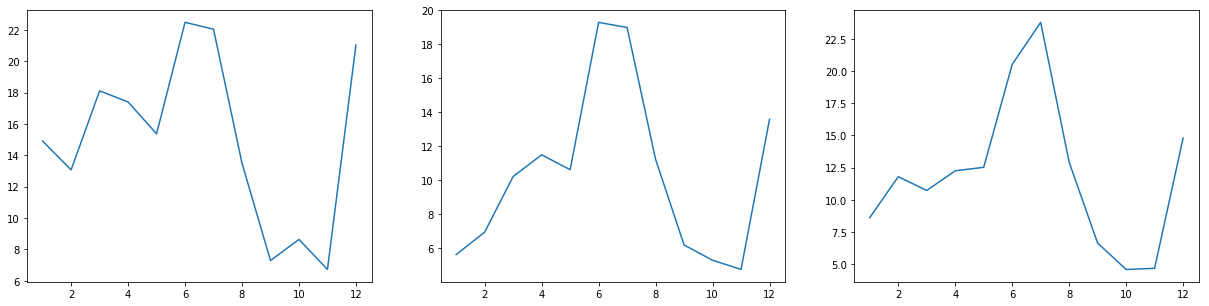

In [93]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))
plt.setp(ax, xticks=np.arange(0, 14, 2))
for i, airport in enumerate([EWR, LGA, JFK]):
    ax[i].plot(airport.groupby('month')['dep_delay'].mean())
plt.show()

Для всех аэропортов средняя задержка имеет самое большое значение в период с июня по август, при этом она резко падает в сентябре, а затем резко возрастает к декабрю. 

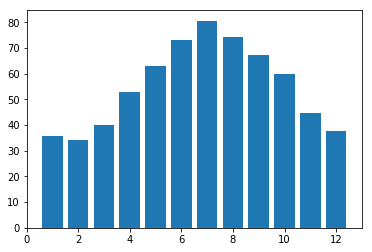

In [39]:
width=0.4
plt.bar(np.arange(1, 13), weather.groupby(['month'])['temp'].mean())
plt.show()

Построив график зависимости температуры от месяца, видим, что самая высокая температура в Нью-Йорке наблюдается летом. Таким образом, можем сделать вывод, что среднее время задержек, возможно, имеет наибольшее значение летом из-за высокой температуры воздуха и осложнений в работе, которые ею вызваны, а зимой - вероятно, из-за новогодних праздников (не из-за климата, потому что в январе-феврале среднее время задержек падает).

Изучим зависимость среднего времени задержек в каждом аэропорту от времен суток.

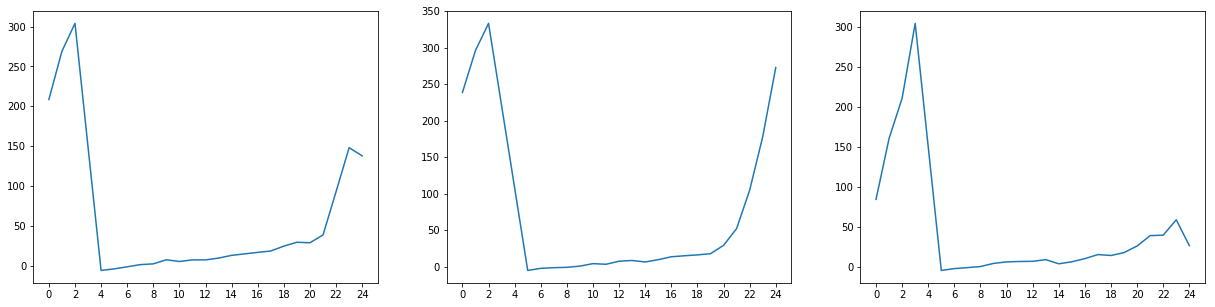

In [46]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))
plt.setp(ax, xticks=np.arange(0, 25, 2))
for i, airport in enumerate([EWR, LGA, JFK]):
    ax[i].plot(airport.groupby('hour')['dep_delay'].mean())
plt.show()

Для всех аэропортов средняя задержка имеет самое большое значение в период 0-3 часа утра, к 4-5 утра резко падает, затем плавно растет до 20 часов, а в период 20-24 происходят расхождения:
в EWR средняя задержка начинает расти быстрее, но не достигает уровня задержки в период 0-3 часа утра;
в LGA она резко возрастает и почти достигает уровня задержки в период 0-3 часа утра;
в JFK средняя задержка незначительно увеличиваетсяк 23 часам и снова падает. 
Данные отличия могут быть связаны с различными факторами: например, с расположением аэропортов.

Изучим зависимость среднего времени задержек от компании-перевозчика для каждого аэропорта.

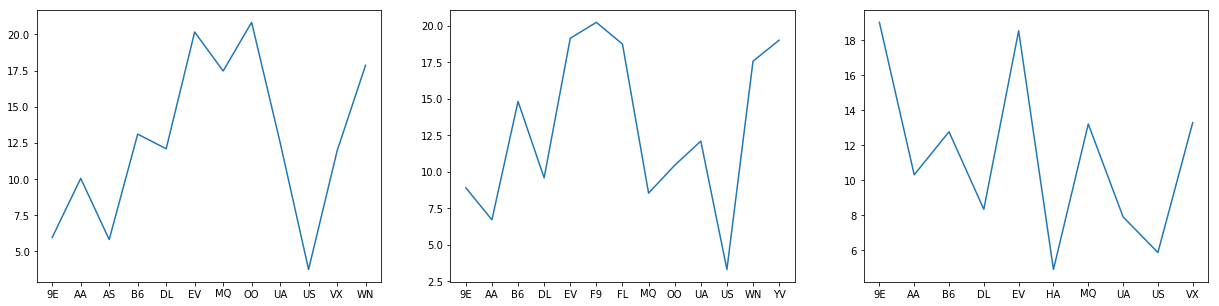

In [80]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))
plt.setp(ax, xticks=np.arange(0, 16, 1))
for i, airport in enumerate([EWR, LGA, JFK]):
    ax[i].plot(airport.groupby('carrier')['dep_delay'].mean())
plt.show()
#EWR['carrier'].unique()
#LGA['carrier'].unique()
#JFK['carrier'].unique()

Видим, что наибольшее среднее время задержки во всех аэропортах - среднее время задержки для компании EV; наименьшее среднее значение задержки для всех аэропортов у компании US. У компаний 9Е, MQ, OO наблюдаются существенные различия в собственных задержках для разных аэропортов: в JFK задержка у 9Е существенно выше, чем в двух остальных аэропортах; у MQ задержка значительно больше в аэропорту EWR; у OO задержка в ~2 раза больше в EWR, чем в LGA. Задержки рейсов всех остальных компаний сопоставимы во всех аэропортах.


Изучим зависимость среднего времени задержек от длины пути данного рейса для каждого аэропорта

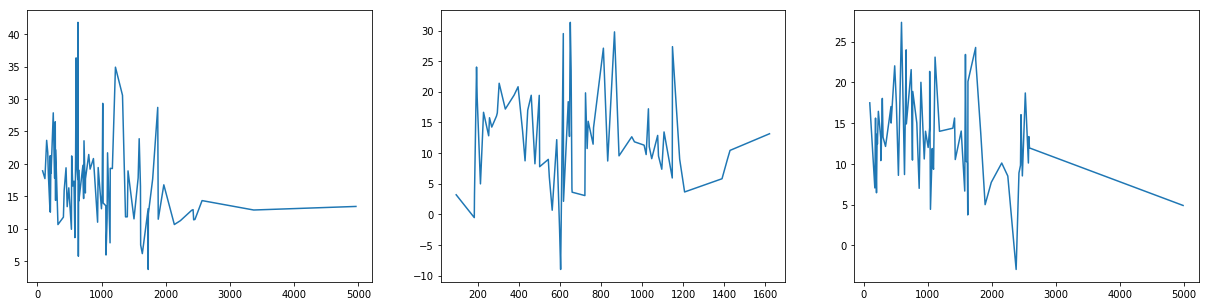

In [82]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))
for i, airport in enumerate([EWR, LGA, JFK]):
    ax[i].plot(airport.groupby('distance')['dep_delay'].mean())
plt.show()

Зависимость среднего времени задержки вылета от длины пути данного маршрута не выявлена. Дистанция, котрая будет пройдена самолетом, никак не влияет на задержки при вылете.

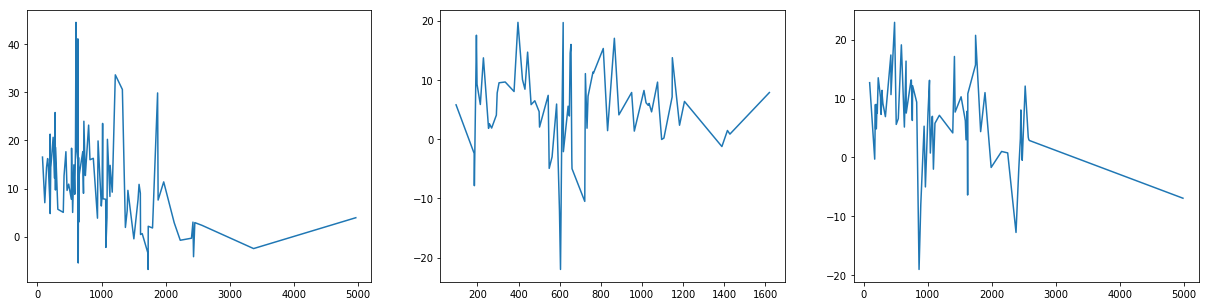

In [83]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))
for i, airport in enumerate([EWR, LGA, JFK]):
    ax[i].plot(airport.groupby('distance')['arr_delay'].mean())
plt.show()

Зависимость среднего времени задержки прилета от длины пути данного маршрута не выявлена. Дистанция, которая будет пройдена самолетом, никак не влияет на задержки прилета. Но можно сказать, что для всех 3х аэропортов задержка прилета минимальна при длине маршрута 500 - 1000.

Изучим зависимость между средним временем задержек вылета и временем в воздухе.

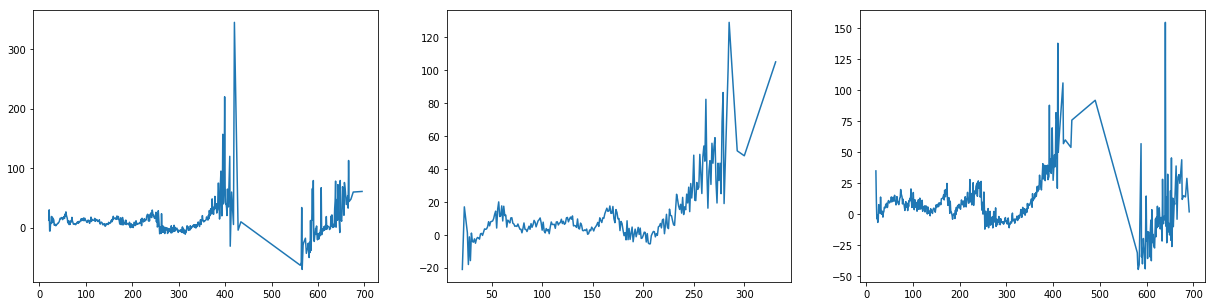

In [90]:
fig, ax = plt.subplots(1, 3, figsize = (21, 5))
#air_time_uniq = airport[airport['air_time'].notna()]
for i, airport in enumerate([EWR, LGA, JFK]):
    ax[i].plot(airport.groupby('air_time')['arr_delay'].mean())
plt.show()

Видим, что общая продолжительность полета не влияет на задержки вылетов. Можем лишь заметить, что LGA не специализируется на длительных полетах.